In [8]:
import string
import random
from random import randint
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
import numpy as np
import os
from PIL import Image, ImageFont, ImageDraw
import matplotlib.pyplot as plt
import math
import random
import copy

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
# !rm -r /content/pictures/

In [11]:
# # Run this command only once:

# # makes the output folder /content/pictures/
# !mkdir pictures

In [12]:
# # Run this command only once

# # Downloads the license plate template to /content/blank_plate.png
# !gdown --id 1Q_FsX2z6DaDCLM91qGZzwvctaW9bN60v

In [13]:
# GEN_PLATES_PATH = "/content/"

# NUMBER_OF_PLATES = 3000

# for i in range(0, NUMBER_OF_PLATES):

#     # Pick two random letters
#     plate_alpha = ""
#     for _ in range(0, 2):
#         plate_alpha += (random.choice(string.ascii_uppercase))

#     # Pick two random numbers
#     num = randint(0, 99)
#     plate_num = "{:02d}".format(num)

#     # Write plate to image
#     blank_plate = cv2.imread(GEN_PLATES_PATH+'blank_plate.png')

#     # Convert into a PIL image (this is so we can use the monospaced fonts)
#     blank_plate_pil = Image.fromarray(blank_plate)

#     # Get a drawing context
#     draw = ImageDraw.Draw(blank_plate_pil)
#     monospace = ImageFont.truetype(font="/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf", 
#                                    size=165)
#     draw.text(xy=(48, 75),
#               text=plate_alpha + " " + plate_num, 
#               fill=(255,0,0), font=monospace)

#     # Convert back to OpenCV image and save
#     blank_plate = np.array(blank_plate_pil)

#     # Write license plate to file
#     cv2.imwrite(os.path.join(GEN_PLATES_PATH + "pictures/", 
#                              "plate_{}{}.png".format(plate_alpha, plate_num)),
#                              blank_plate)

In [14]:
# BOUNDS = np.array([48, 155, 356, 454])-1
# CHAR_WIDTH = 98 #step of bounds
# CHAR_HEIGHT = 108
# NUMBER_OF_LABELS = 36

# def convert_to_one_hot(char):
#   o = ord(char) # https://www.w3schools.com/charsets/ref_html_ascii.asp
#   if o >= 65:
#     index = o - 65 + 10
#   else:
#     index = o - 48
#   one_hot = np.zeros(36)
#   one_hot[index] = 1
#   return one_hot

# # noise_applications = ["s&p", "speckle"]
# apply_blur = [True, False]
# beta_vals = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
# new_height = 200
# new_width = 150
# alpha = 5

# uh_plate = 125
# us_plate = 255
# uv_plate = 255
# lh_plate = 118
# ls_plate = 100 # 85 to 100
# lv_plate = 40
# lower_hsv_plate = np.array([lh_plate,ls_plate,lv_plate])
# upper_hsv_plate = np.array([uh_plate,us_plate,uv_plate])


# for filename in os.listdir("/content/pictures/"):
#   f = os.path.join("/content/pictures/", filename)
#   img = cv2.imread(f)
  
#   chars = list(filename[6:10]) #extract plate characters from filename as list
#   for i in range(len(BOUNDS)):
#     x = BOUNDS[i]
#     char = img[100:248, x:x+CHAR_WIDTH] #(y, x)
#     height, width, _ = char.shape
    
#     noise_index = random.randint(0,1) # random noise profile
#     transform_index = random.randint(0,7) # random transform profile
#     beta_index = random.randint(0, len(beta_vals)-1)
    
#     # perspective transforms
#     pts_og = np.float32([[0,0], [0, height], [width, height], [width,0]]) #[x,y], counterclockwise from top left (top left, bottom left, bottom right, top right)
#     pts_new_0 = np.float32([[0,20], [0, 110], [new_width, 70], [new_width,0]])
#     pts_new_1 = np.float32([[0,20], [0, 140], [new_width, 100], [new_width,0]])
#     pts_new_2 = np.float32([[0,20], [0, 140], [new_width, 150], [new_width,40]])
#     pts_new_3 = np.float32([[0,20], [0, 140], [new_width, 200], [new_width,20]])
#     pts_new_4 = np.float32([[0,40], [0, 140], [new_width, 170], [new_width,20]])
#     pts_new_5 = np.float32([[0,20], [0, 180], [new_width, 180], [new_width,50]])
#     pts_new_6 = np.float32([[0,20], [0, 180], [new_width, 130], [new_width,50]])
#     pts_new_7 = np.float32([[10,40], [10, 90], [100, 200], [100,20]])
#     perspective_transform_out_pts = [pts_new_0, pts_new_1, pts_new_2, pts_new_3, pts_new_4, pts_new_5, pts_new_6, pts_new_7]
    
#     M = cv2.getPerspectiveTransform(pts_og, perspective_transform_out_pts[transform_index])
#     char_transform = cv2.warpPerspective(char, M, (new_width,new_height))
#     # convert all black to same plate colour
#     hsv = cv2.cvtColor(char_transform, cv2.COLOR_BGR2HSV)
#     mask = cv2.inRange(hsv, lower_hsv_plate, upper_hsv_plate)
#     indicies = np.where(mask==0)
#     char_transform[indicies[0], indicies[1], :] = [216,218,220]
#     # cv2_imshow(char_transform)

#     # adjust image contrast
#     beta_val = beta_vals[beta_index]
#     char_contrast = np.array(list(map(lambda num: np.clip(alpha*num + beta_val, 0, 255),char_transform)))
#     char_gray = cv2.cvtColor(char_contrast, cv2.COLOR_BGR2GRAY)

#     # cv2_imshow(char_gray)

#     char_resized = cv2.resize(char_gray,(50,80),interpolation=cv2.INTER_AREA)
#     char_one_hot = convert_to_one_hot(chars[i]).T #must be transposed for NN
#     training_data.append([np.array(char_resized), char_one_hot])


In [15]:
# np.save('/content/gdrive/MyDrive/generated_chars_training_data.npy', np.asarray(training_data))

In [16]:
# cv2_imshow(char)
# height, width, _ = char.shape
# new_height = 200
# new_width = 150
# pts_og = np.float32([[0,0], [0, height], [width, height], [width,0]]) #[x,y], counterclockwise from top left (top left, bottom left, bottom right, top right)
# pts_new = np.float32([[10,40], [10, 90], [100, 200], [100,20]])
# M = cv2.getPerspectiveTransform(pts_og, pts_new)
# char_transform = cv2.warpPerspective(char, M, (new_width,new_height))

# uh_plate = 125
# us_plate = 255
# uv_plate = 255
# lh_plate = 118
# ls_plate = 100 # 85 to 100
# lv_plate = 40
# lower_hsv_plate = np.array([lh_plate,ls_plate,lv_plate])
# upper_hsv_plate = np.array([uh_plate,us_plate,uv_plate])

# hsv = cv2.cvtColor(char_transform, cv2.COLOR_BGR2HSV)
# mask = cv2.inRange(hsv, lower_hsv_plate, upper_hsv_plate)
# indicies = np.where(mask==0)
# char_transform[indicies[0], indicies[1], :] = [216,218,220]

# cv2_imshow(mask)
# # print(mask.shape)
# # char_transform[np.where(mask==[0,0])] = [216,218,220]

# char_resized = cv2.resize(char_transform,(50,80),interpolation=cv2.INTER_AREA)
# cv2_imshow(char_resized)

In [17]:
# image = char_transform
# new_image = copy.deepcopy(image)
# alpha = 5.0 # 1.0-3.0
# beta = 200 # 0-100

# for y in range(image.shape[0]):
#     for x in range(image.shape[1]):
#         for c in range(image.shape[2]):
#             new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)

# cv2_imshow(image)
# cv2_imshow(new_image)

In [18]:
# def clip(num): 
#   return np.clip(alpha*num + beta, 0, 255)

# image_vectorized = np.vectorize(clip)
# cv2_imshow(image_vectorized)

In [19]:
# def clip(num): 
#   return np.clip(alpha*num + beta, 0, 255)

# cv2_imshow(image)
# image_vectorized = np.array(list(map(clip,image)))
# cv2_imshow(image_vectorized)

In [20]:
training_data = []

In [21]:
# chars 74k dataset loading

PATH = "/content/gdrive/MyDrive/EnglishImg"
count = 0

beta_vals = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
new_height = 200
new_width = 150
alpha = 5

pts_new_0 = np.float32([[0,20], [0, 110], [new_width, 70], [new_width,0]])
pts_new_1 = np.float32([[0,20], [0, 140], [new_width, 100], [new_width,0]])
pts_new_2 = np.float32([[0,20], [0, 140], [new_width, 150], [new_width,40]])
pts_new_3 = np.float32([[0,20], [0, 140], [new_width, 200], [new_width,20]])
pts_new_4 = np.float32([[0,40], [0, 140], [new_width, 170], [new_width,20]])
pts_new_5 = np.float32([[0,20], [0, 180], [new_width, 180], [new_width,50]])
pts_new_6 = np.float32([[0,20], [0, 180], [new_width, 130], [new_width,50]])
pts_new_7 = np.float32([[10,40], [10, 90], [100, 200], [100,20]])
perspective_transform_out_pts = [pts_new_0, pts_new_1, pts_new_2, pts_new_3, pts_new_4, pts_new_5, pts_new_6, pts_new_7]

i = -1
# for i in range(2): # go over characters twice
for dir in os.listdir(PATH):
  dir_path = os.path.join(PATH,dir) # set1, set2
  for subdir in os.listdir(dir_path):
    sub_dir_path = os.path.join(dir_path,subdir) #Sample002
    for filename in os.listdir(sub_dir_path): #img002-00009.png
      print(count)    
      img = cv2.imread(os.path.join(sub_dir_path,filename))
      if i == 0: # first loop, do transforms
        height, width, _ = img.shape
    
        # perspective transform
        transform_index = random.randint(0,7) # random transform profile
        beta_index = random.randint(0, len(beta_vals)-1)

        pts_og = np.float32([[0,0], [0, height], [width, height], [width,0]]) #[x,y], counterclockwise from top left (top left, bottom left, bottom right, top right)
        M = cv2.getPerspectiveTransform(pts_og, perspective_transform_out_pts[transform_index])
        char_transform = cv2.warpPerspective(img, M, (new_width,new_height))

        # adjust image contrast
        beta_val = beta_vals[beta_index]
        char_contrast = np.array(list(map(lambda num: np.clip(alpha*num + beta_val, 0, 255),char_transform)))
      else: #
        char_contrast = img

      # gray and resize
      img_gray = cv2.cvtColor(char_contrast, cv2.COLOR_BGR2GRAY)
      img_resized = cv2.resize(img_gray,(50,80),interpolation=cv2.INTER_AREA) #dsize is (width,height)
      char_idx = int(filename[3:6]) - 1 #002
      one_hot = np.zeros(36)
      one_hot[char_idx] = 1
      training_data.append([np.array(img_resized),one_hot.T]) #must be transposed for NN
      count += 1

Streaming output truncated to the last 5000 lines.
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281
4282
4283
4284
4285
4286
4287
4288
4289
4290
4291
4292
4293
4294
4295
4296
4297
4298
4299
4300
4301
4302
4303
4304
4305
4306
4307
4308
4309
4310
4311
4312
4313
4314
4315
4316
4317
4318
4319
4320
4321
4322
4323
4324
4325
4326
4327
4328
4329
4330
4331
4332
4333
4334
4335
4336
4337
4338
4339
4340
4341
4342

In [23]:
# cv2_imshow(img)
training_data = np.asarray(training_data)
print(filename)
print(training_data.shape)
print((training_data[0][0].shape))
print(img.shape)
print(img_gray.shape)

# cv2_imshow(training_data[16000][0])
# print(training_data[16000][1])
# dim = (50,80) #width,height
# resized = cv2.resize(training_data[0][0],dim,interpolation=cv2.INTER_AREA)
# cv2_imshow(resized)


img033-00033.png
(9153, 2)
(80, 50)
(76, 72, 3)
(76, 72)


In [24]:
np.save('/content/gdrive/MyDrive/chars_74k_and_transforms.npy', np.asarray(training_data))

#Training CNN

In [25]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import losses

from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend

In [48]:
def reset_weights(model):
  for ix, layer in enumerate(model.layers):
      if (hasattr(model.layers[ix], 'kernel_initializer') and 
          hasattr(model.layers[ix], 'bias_initializer')):
          weight_initializer = model.layers[ix].kernel_initializer
          bias_initializer = model.layers[ix].bias_initializer

          old_weights, old_biases = model.layers[ix].get_weights()

          model.layers[ix].set_weights([
              weight_initializer(shape=old_weights.shape),
              bias_initializer(shape=len(old_biases))])

In [49]:
VALIDATION_SPLIT = 0.2

NUMBER_OF_LABELS = 36
np.random.shuffle(training_data)
X_dataset = np.array([data[0] for data in training_data]) / 255 #normalize
Y_dataset = np.array([data[1] for data in training_data])
shape = X_dataset.shape
print(shape)
total_images = shape[0]
height_img = shape[1]
width_img = shape[2]

print(f"total images: {total_images}")
print(f"image height: {height_img}")
print(f"image width: {width_img}")

(9153, 80, 50)
total images: 9153
image height: 80
image width: 50


In [50]:
from ipywidgets import interact
import ipywidgets as ipywidgets

# Display images in the training data set. 
def displayImage(index):
  plt.imshow(X_dataset[index])
  caption = ("y = " + str(Y_dataset[index]))#str(np.squeeze(Y_dataset_orig[:, index])))
  plt.text(0.5, 0.5, caption, 
           color='orange', fontsize = 20,
           horizontalalignment='left', verticalalignment='top')


interact(displayImage, 
         index=ipywidgets.IntSlider(min=0, max=X_dataset.shape[0],
                                    step=1, value=10))
#displayImage(2)

interactive(children=(IntSlider(value=10, description='index', max=9153), Output()), _dom_classes=('widget-int…

<function __main__.displayImage(index)>

In [62]:
# plot training data histogram

one_hot = Y_dataset[0]
print(one_hot)

index = np.nonzero(one_hot)
print(index)
print(int(index[0]))
print(one_hot[24])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(array([24]),)
24
1.0


In [63]:
one_hot_indicies = [int(np.nonzero(i)[0]) for i in Y_dataset]

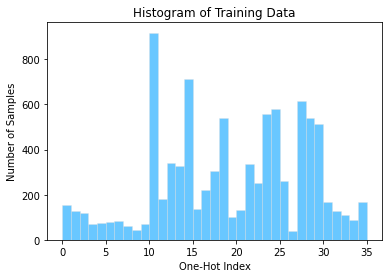

In [71]:
n, bins, patches = plt.hist(one_hot_indicies, bins=range(min(one_hot_indicies), max(one_hot_indicies) + 1, 1), facecolor = '#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
n = n.astype('int') # it MUST be integer
# for i in range(len(patches)):
#     patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))

plt.title("Histogram of Training Data")
plt.xlabel("One-Hot Index")
plt.ylabel("Number of Samples")
plt.show()

In [64]:
one_hot_indicies

[24,
 23,
 27,
 10,
 13,
 10,
 24,
 13,
 17,
 24,
 30,
 14,
 6,
 16,
 10,
 31,
 12,
 16,
 11,
 28,
 15,
 24,
 10,
 16,
 23,
 10,
 17,
 14,
 27,
 21,
 19,
 16,
 24,
 29,
 23,
 17,
 0,
 11,
 17,
 22,
 10,
 17,
 29,
 15,
 22,
 10,
 12,
 24,
 18,
 22,
 29,
 10,
 27,
 21,
 19,
 23,
 10,
 10,
 34,
 30,
 14,
 12,
 31,
 10,
 1,
 31,
 29,
 13,
 6,
 28,
 24,
 16,
 10,
 22,
 18,
 18,
 27,
 24,
 11,
 12,
 18,
 11,
 0,
 14,
 18,
 18,
 12,
 21,
 13,
 25,
 3,
 29,
 34,
 31,
 28,
 22,
 20,
 30,
 25,
 17,
 13,
 17,
 23,
 17,
 19,
 10,
 17,
 14,
 29,
 14,
 30,
 33,
 10,
 21,
 33,
 34,
 24,
 33,
 10,
 23,
 10,
 24,
 27,
 21,
 35,
 21,
 25,
 14,
 23,
 28,
 29,
 27,
 24,
 22,
 28,
 25,
 24,
 27,
 13,
 15,
 2,
 23,
 34,
 16,
 15,
 1,
 29,
 27,
 4,
 18,
 28,
 0,
 13,
 2,
 29,
 29,
 30,
 27,
 10,
 11,
 32,
 8,
 10,
 18,
 19,
 10,
 2,
 31,
 2,
 14,
 10,
 26,
 11,
 28,
 24,
 10,
 2,
 30,
 10,
 29,
 23,
 14,
 28,
 28,
 17,
 3,
 12,
 2,
 24,
 14,
 27,
 18,
 27,
 27,
 18,
 29,
 18,
 13,
 29,
 24,
 22,
 0,
 29,
 10

In [29]:
conv_model = models.Sequential()
conv_model.add(layers.Reshape((X_dataset[0].shape[0],X_dataset[0].shape[1],1),input_shape=X_dataset.shape[1:]))
conv_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                             input_shape=(X_dataset[0].shape[0], X_dataset[0].shape[1])))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Flatten())
conv_model.add(layers.Dropout(0.5))
conv_model.add(layers.Dense(512, activation='relu'))
conv_model.add(layers.Dense(NUMBER_OF_LABELS, activation='softmax'))

In [56]:
conv_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_12 (Reshape)        (None, 80, 50, 1)         0         
                                                                 
 conv2d_12 (Conv2D)          (None, 78, 48, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 39, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 37, 22, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 18, 11, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 9, 128)      

In [51]:
LEARNING_RATE = 1e-4
loss_fn = losses.CategoricalCrossentropy(from_logits=False)
conv_model.compile(loss=loss_fn,
                   optimizer=optimizers.RMSprop(learning_rate=LEARNING_RATE),
                   metrics=['acc'])

In [52]:
reset_weights(conv_model)

In [53]:
history_conv = conv_model.fit(X_dataset, Y_dataset, 
                              validation_split=VALIDATION_SPLIT, 
                              epochs=40, 
                              batch_size=16)

Epoch 1/40
458/458 [==============================] - 4s 7ms/step - loss: 3.3127 - acc: 0.0888 - val_loss: 3.2749 - val_acc: 0.0961
Epoch 2/40
458/458 [==============================] - 3s 7ms/step - loss: 3.2475 - acc: 0.1120 - val_loss: 3.2179 - val_acc: 0.1420
Epoch 3/40
458/458 [==============================] - 3s 6ms/step - loss: 3.0307 - acc: 0.2140 - val_loss: 2.7673 - val_acc: 0.3681
Epoch 4/40
458/458 [==============================] - 3s 7ms/step - loss: 2.5564 - acc: 0.3681 - val_loss: 2.2509 - val_acc: 0.4336
Epoch 5/40
458/458 [==============================] - 3s 7ms/step - loss: 2.1465 - acc: 0.4497 - val_loss: 1.8468 - val_acc: 0.5079
Epoch 6/40
458/458 [==============================] - 3s 6ms/step - loss: 1.8474 - acc: 0.5026 - val_loss: 1.6414 - val_acc: 0.6024
Epoch 7/40
458/458 [==============================] - 3s 6ms/step - loss: 1.6246 - acc: 0.5582 - val_loss: 1.4736 - val_acc: 0.6499
Epoch 8/40
458/458 [==============================] - 3s 7ms/step - loss: 1.

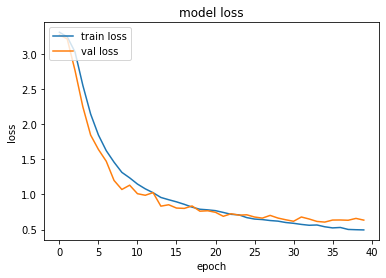

In [54]:
plt.plot(history_conv.history['loss'])
plt.plot(history_conv.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss'], loc='upper left')
plt.show()

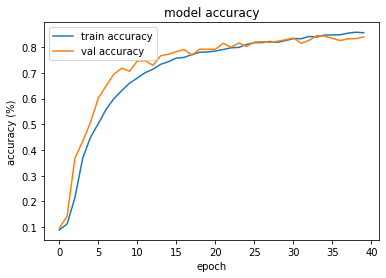

In [55]:
plt.plot(history_conv.history['acc'])
plt.plot(history_conv.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy (%)')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'val accuracy'], loc='upper left')
plt.show()

In [37]:
conv_model.save("conv_model_74k_generated_2")

In [38]:
!zip -r /content/model_74k_generated.zip /content/conv_model_74k_generated/

  adding: content/conv_model_74k_generated/ (stored 0%)
  adding: content/conv_model_74k_generated/variables/ (stored 0%)
  adding: content/conv_model_74k_generated/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/conv_model_74k_generated/variables/variables.index (deflated 66%)
  adding: content/conv_model_74k_generated/assets/ (stored 0%)
  adding: content/conv_model_74k_generated/saved_model.pb (deflated 89%)
  adding: content/conv_model_74k_generated/keras_metadata.pb (deflated 92%)


In [39]:
files.download("/content/model_74k_generated.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
from tensorflow import keras
conv_model = keras.models.load_model('/content/gdrive/MyDrive/conv_model_74k')

In [41]:
TEST_PATH = "/content/gdrive/MyDrive/test_chars"

test_data = []

for filename in os.listdir(TEST_PATH):
      if filename[0] == ".":
        continue
      print(os.path.join(TEST_PATH, filename))
      img = cv2.imread(os.path.join(TEST_PATH,filename))
      img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img_resized = cv2.resize(img_gray,(50,80),interpolation=cv2.INTER_AREA) #dsize is (width,height)
      char_idx = int(filename[0:3]) - 1 #002
      one_hot = np.zeros(36)
      one_hot[char_idx] = 1
      test_data.append([np.array(img_resized),one_hot.T]) #must be transposed for NN

np.asarray(test_data)

/content/gdrive/MyDrive/test_chars/011.png
/content/gdrive/MyDrive/test_chars/024.png
/content/gdrive/MyDrive/test_chars/007.png
/content/gdrive/MyDrive/test_chars/001.png
/content/gdrive/MyDrive/test_chars/022.png
/content/gdrive/MyDrive/test_chars/006.jpg
/content/gdrive/MyDrive/test_chars/004.png
/content/gdrive/MyDrive/test_chars/011-1.png
/content/gdrive/MyDrive/test_chars/008.png
/content/gdrive/MyDrive/test_chars/003.png
/content/gdrive/MyDrive/test_chars/021.png


<ipython-input-41-8c2dab00207d>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.asarray(test_data)


array([[array([[228, 228, 228, ..., 198, 198, 201],
               [230, 229, 228, ..., 199, 200, 202],
               [230, 229, 228, ..., 195, 178, 186],
               ...,
               [219, 216, 219, ..., 226, 225, 225],
               [221, 217, 219, ..., 224, 226, 226],
               [222, 220, 219, ..., 231, 231, 231]], dtype=uint8),
        array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0.])                                                           ],
       [array([[198, 199, 200, ..., 197, 197, 197],
               [199, 201, 202, ..., 197, 198, 200],
               [200, 203, 203, ..., 199, 200, 204],
               ...,
               [166, 163, 161, ..., 157, 157, 159],
               [165, 163, 161, ..., 159, 158, 159],
               [164, 164, 163, ..., 160, 160, 161]], dtype=uint8),
        array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

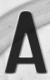

(80, 50)
11


In [43]:
cv2_imshow(test_data[0][0])
print((test_data[0][0].shape))
print(len(test_data))

In [44]:
#display confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_X = np.array([data[0] for data in test_data]) / 255
test_Y_truth = np.array([data[1] for data in test_data])
test_Y_predict = [conv_model.predict(np.expand_dims(img, axis=0))[0] for img in test_X]

max_Y_truth = [np.argmax(i) for i in test_Y_truth]
max_Y_predict = [np.argmax(i) for i in test_Y_predict]


confusion_matrix = confusion_matrix(max_Y_truth, max_Y_predict) #https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix


1/1 [==============================] - 0s 16ms/step


In [45]:
print(max_Y_truth[1])
print(max_Y_predict[1])

23
23


In [46]:
from ipywidgets import interact
import ipywidgets as ipywidgets

def displayImage(index):
  img = test_X[index]
  
  img_aug = np.expand_dims(img, axis=0)
  y_predict = conv_model.predict(img_aug)[0]
  
  plt.imshow(img)  
  caption = ("GND truth: {} \nPredicted: {}".format(np.argmax(test_Y_truth[index]), np.argmax(test_Y_predict[index])))
  plt.text(0.5, 0.5, caption, 
           color='orange', fontsize = 16,
           horizontalalignment='left', verticalalignment='bottom')


interact(displayImage, 
        index=ipywidgets.IntSlider(min=0, max=test_X.shape[0]-1,
                                   step=1, value=10))
#displayImage(5)

interactive(children=(IntSlider(value=10, description='index', max=10), Output()), _dom_classes=('widget-inter…

<function __main__.displayImage(index)>

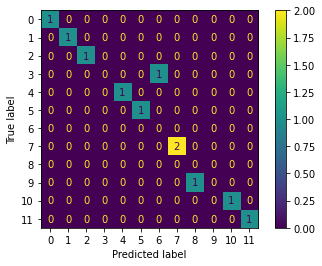

In [47]:
disp = ConfusionMatrixDisplay(confusion_matrix) #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay
disp.plot()
plt.show()